In [ ]:
!pip install xgboost

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from scipy import stats
from scipy.stats import randint
import pickle

## Import datasets encodeados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
ls

drive/  sample_data/


In [4]:
cd '/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/Parte III - Machine Learning'

/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/Parte III - Machine Learning


In [3]:
x_train = pd.read_csv('../ieee-fraud-detection/x_train.csv')
y_train = pd.read_csv('../ieee-fraud-detection/y_train.csv')
x_val = pd.read_csv('../ieee-fraud-detection/x_val.csv')
y_val = pd.read_csv('../ieee-fraud-detection/y_val.csv')

In [4]:
x_train = x_train.values
y_train = y_train.values.ravel() # al guardarlo como csv me quedo como un vector de columnas.

x_val = x_val.values
y_val = y_val.values.ravel() # al guardarlo como csv me quedo como un vector de columnas.

## XGBClassifier

#### Sin busqueda de hiper-parametros

In [7]:
modelXGClass = XGBClassifier(random_state=0)

In [8]:
modelXGClass.fit(x_train,y_train)

XGBClassifier()

In [9]:
print(classification_report(y_val, modelXGClass.predict(x_val)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    114044
           1       0.80      0.27      0.40      4064

    accuracy                           0.97    118108
   macro avg       0.89      0.63      0.69    118108
weighted avg       0.97      0.97      0.97    118108



In [10]:
roc_auc_score(y_val, modelXGClass.predict_proba(x_val)[:,1])

0.8689963739043807

#### RandomizedSearchCV entrenamiento

In [5]:
np.random.seed(seed=233423)
# con estos parametros se me moria el kernel 
param_dist1 = { 'objective': ['binary:logistic'],
                'learning_rate':np.arange(0.1,0.5,0.1),
                'n_estimators':np.arange(16,116,15),
                'scale_pos_weight':np.arange(2,6,1),
                'max_depth':np.arange(4,12,1),
                'min_child_weight':np.arange(1,10,1),
                'gamma':np.arange(0,0.5,0.1),
                'subsample':np.arange(0.6,1,0.1),
                'colsample_bytree':np.arange(0.6,0.91,0.05),
                'colsample_bylevel':np.arange(0.6,0.91,0.05)
                }

# con estos parametros estuvo entrenando más de 6 horas, lo corte
param_dist2 = {'objective': ['binary:logistic'],
              'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [10,11,12,13,14,15],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

# elijo los que me resultan mas importantes para poder buscar algo básico
param_dist3 = { 'max_depth': [5,6,7,8,9,10],
                'n_estimators': [100]    
              }

In [6]:
%%time
# defino el modelo para tunear
modelXGClass = XGBClassifier(random_state=0, n_jobs=1)

modelXGClass_random = RandomizedSearchCV(estimator = modelXGClass, param_distributions = param_dist3, cv = 3,n_iter = 2, verbose=2, n_jobs = 1, scoring='roc_auc',random_state=0)
# Fiteamos el modelo random con nuestros datos
search = modelXGClass_random.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=10, n_estimators=100; total time=10.9min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=10, n_estimators=100; total time=10.7min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=10, n_estimators=100; total time=10.8min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=7, n_estimators=100; total time= 7.6min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=7, n_estimators=100; total time= 7.7min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=7, n_estimators=100; total time= 7.7min


C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 7min 33s


Lo guardo para no tener que volver a entrenarlo

In [ ]:
with open('XGBClassifier_backup', 'wb') as XGBClassifier_backup_file:
    pickle.dump(search, XGBClassifier_backup_file)

#### Resultados

In [7]:
print(classification_report(y_val, search.predict(x_val)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    114044
           1       0.81      0.37      0.51      4064

    accuracy                           0.98    118108
   macro avg       0.89      0.68      0.75    118108
weighted avg       0.97      0.98      0.97    118108



In [8]:
roc_auc_score(y_val, search.predict_proba(x_val)[:,1])

0.9063237947323549

Lo voy a exportar para la competencia

In [9]:
df_test = pd.read_csv('../ieee-fraud-detection/df_test.csv')
TransactionID = pd.read_csv('../ieee-fraud-detection/test_merged.csv')['TransactionID']

In [16]:
XGClassifier_submission=pd.DataFrame(TransactionID).join(pd.DataFrame(search.predict_proba(df_test.values)[:,1],columns=['isFraud']))
XGClassifier_submission.head()

,TransactionID,isFraud
0,3663549,0.023813
1,3663550,0.001765
2,3663551,0.005088
3,3663552,0.000837
4,3663553,0.006383


In [23]:
XGClassifier_submission.to_csv('../ieee-fraud-detection/XGClassifier_submission.csv',index=False)

Fue mucho mejor que cualquier otro! Este es mi definitivo

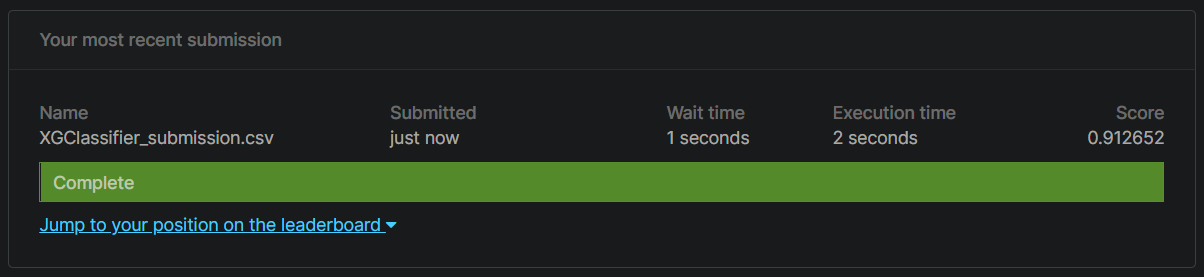

In [24]:
from IPython import display
display.Image("../imagenes/XGClassifier.png")